# Uncovering Global Socio-Economic Outliers: Anomaly Detection in Country Data

This project focuses on identifying countries with unique or anomalous socio-economic conditions using various unsupervised anomaly detection algorithms. Through the use of K-Means clustering, DBSCAN, Isolation Forest, and One-Class SVM, the project seeks to uncover global outliers that may indicate countries facing extreme challenges or irregular patterns. The goal is to provide insights that can help target international aid and policy interventions for countries exhibiting significant socio-economic disparities.

## About the Dataset

The dataset used in this project comes from the **Country Data** dataset on Kaggle, which contains socio-economic indicators for 167 countries. It includes 10 numerical features that capture a country's performance in key areas such as health, economy, and demographic factors. These features include metrics like child mortality (deaths of children under 5 per 1000 live births), GDP per capita, life expectancy, inflation rates, income levels, and fertility rates.

Each feature is a representation of a country's socio-economic condition, providing a holistic view of its development and challenges. For instance, exports and imports are expressed as percentages of GDP, highlighting the trade balance, while health spending and inflation rates indicate economic stability and public health investment.

Source: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

## Data Dictionary

| Column Name         | Data Type | Description |
|---------------------|-----------|-------------|
| country             | string    | Name of the country |
| child_mort          | float     | Death of children under 5 years of age per 1000 live births |
| exports             | float     | Exports of goods and services per capita. Given as %age of the GDP per capita |
| health              | float     | Total health spending per capita. Given as %age of GDP per capita |
| imports             | float     | Imports of goods and services per capita. Given as %age of the GDP per capita |
| income              | float     | Net income per person |
| inflation           | float     | The measurement of the annual growth rate of the Total GDP |
| life_expec          | float     | The average number of years a new born child would live if the current mortality patterns are to remain the same |
| total_fer           | float     | The number of children that would be born to each woman if the current age-fertility rates remain the same |
| gdpp                | float     | The GDP per capita. Calculated as the Total GDP divided by the total population. |

## Notebook Sections
This notebook is divided into 6 parts:
1. **Data Prep and EDA:** Load and explore the data.
1. **Data Preprocessing:** Prepare the data for modeling.
1. **Model Building:** Train anomaly detection models.
1. **Model Visualization:** Visualize model results.
1. **Model Evaluation:** Compare model performances.
1. **Conclusion:** Summarize findings and insights.

# 1. Data Prep and EDA

In [1]:
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Load the dataset and data dictionary to start with the initial analysis
dataset_path = '../Data/Country-data.csv'

# Reading the dataset
country_data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset and the data dictionary for inspection
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
# Check for missing values in the dataset
missing_values = country_data.isnull().sum()

# Get basic descriptive statistics of the dataset
descriptive_stats = country_data.describe()

missing_values, descriptive_stats

(country       0
 child_mort    0
 exports       0
 health        0
 imports       0
 income        0
 inflation     0
 life_expec    0
 total_fer     0
 gdpp          0
 dtype: int64,
        child_mort     exports      health     imports         income  \
 count  167.000000  167.000000  167.000000  167.000000     167.000000   
 mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
 std     40.328931   27.412010    2.746837   24.209589   19278.067698   
 min      2.600000    0.109000    1.810000    0.065900     609.000000   
 25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
 50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
 75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
 max    208.000000  200.000000   17.900000  174.000000  125000.000000   
 
         inflation  life_expec   total_fer           gdpp  
 count  167.000000  167.000000  167.000000     167.000000  
 mean     7.781832   70.555689    2.

### Notes
**Missing Values**
-  There are no missing values in any of the columns, so no immediate need for imputation or deletion.

**Descriptive Statistics**
-  **Child Mortality:** The child mortality rate ranges from 2.6 to 208 deaths per 1000 children under 5. The mean is 38.27, with a high standard deviation (40.33), indicating a wide disparity across countries.
-  **Exports/Imports:** The percentage of GDP from exports and imports varies widely, with imports ranging from 0.07% to 174% and exports from 0.11% to 200%. These outliers may need further analysis.
-  **Income:** The income ranges from \\$609 to \\$125,000, with a large standard deviation, reflecting economic inequality among countries.
-  **Inflation:** The inflation rate varies significantly, from -4.21% to 104%, which could indicate countries experiencing hyperinflation or deflation.
-  **Life Expectancy:** Ranges from 32.1 to 82.8 years, indicating notable health disparities.
-  **GDP per capita:** Ranges from \\$231 to \\$105,000, again showing vast differences in economic conditions.

# 2. Data Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Drop the 'country' column, as it is not useful for the clustering and scaling process
country_data_numerical = country_data.drop(columns=['country'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
scaled_data = scaler.fit_transform(country_data_numerical)

# Convert the scaled data back to a DataFrame for easy readability
scaled_country_data = pd.DataFrame(scaled_data, columns=country_data_numerical.columns)

# Checking the scaled data and providing the scaled summary statistics
scaled_summary_stats = scaled_country_data.describe()

# Display the DataFrame (first few rows)
print("Scaled Country Data:")
print(scaled_country_data.head())

# Print the scaled summary statistics
print("\nSummary Statistics:")
print(scaled_summary_stats)

Scaled Country Data:
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  

Summary Statistics:
         child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -3.722904e-17  2.127373e-16  5.504579e-16  2.765585e-16 -7.977650e-17   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.87

### Notes
-  All numerical features have been standardized using StandardScaler, which ensures that each feature has a mean of 0 and a standard deviation of 1. This is crucial for clustering algorithms that are distance-based, such as K-Means or DBSCAN.

# 3. Model Building

In [4]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import numpy as np
import pandas as pd

# Initialize models
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming 5 clusters for K-Means
dbscan = DBSCAN(eps=1.5, min_samples=5)
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
one_class_svm = OneClassSVM(gamma='auto', nu=0.05)  # nu represents the expected outlier ratio

# Fit models
kmeans.fit(scaled_country_data)
dbscan.fit(scaled_country_data)
isolation_forest.fit(scaled_country_data)
one_class_svm.fit(scaled_country_data)

# Predicting anomalies for each model
kmeans_labels = kmeans.labels_  # Get cluster labels from K-Means
dbscan_labels = dbscan.labels_  # Get cluster labels from DBSCAN (-1 represents anomalies)
iso_forest_anomalies = isolation_forest.predict(scaled_country_data)  # -1 represents anomalies
svm_anomalies = one_class_svm.predict(scaled_country_data)  # -1 represents anomalies

# Collect anomalies: In K-Means, anomalies are those farthest from the centroids
distances_from_centroids = np.min(kmeans.transform(scaled_country_data), axis=1)
kmeans_anomalies = distances_from_centroids > np.percentile(distances_from_centroids, 95)

# Create a dictionary to store the anomaly detection results for each model
anomaly_results = {
    "K-Means": kmeans_anomalies,
    "DBSCAN": dbscan_labels == -1,  # -1 are the outliers
    "Isolation Forest": iso_forest_anomalies == -1,
    "One-Class SVM": svm_anomalies == -1
}

# Convert the results to a DataFrame for easier comparison
anomaly_df = pd.DataFrame(anomaly_results, index=country_data['country'])

# Display the entire DataFrame
pd.set_option('display.max_rows', None)  # Ensure all rows are shown
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
print(anomaly_df.to_string())  # Print the entire DataFrame

                                K-Means  DBSCAN  Isolation Forest  One-Class SVM
country                                                                         
Afghanistan                       False   False             False          False
Albania                           False   False             False          False
Algeria                           False   False             False          False
Angola                            False    True             False          False
Antigua and Barbuda               False   False             False          False
Argentina                         False   False             False          False
Armenia                           False   False             False          False
Australia                         False   False             False          False
Austria                           False   False             False          False
Azerbaijan                        False   False             False          False
Bahamas                     

### Notes
-  **K-Means:** Anomalies are countries farthest from the centroids.
-  **DBSCAN:** Anomalies are classified as noise (-1).
-  **Isolation Forest:** Identified anomalies with -1 as outliers.
-  **One-Class SVM:** Detected anomalies also marked as -1.

# 4. Model Visualization

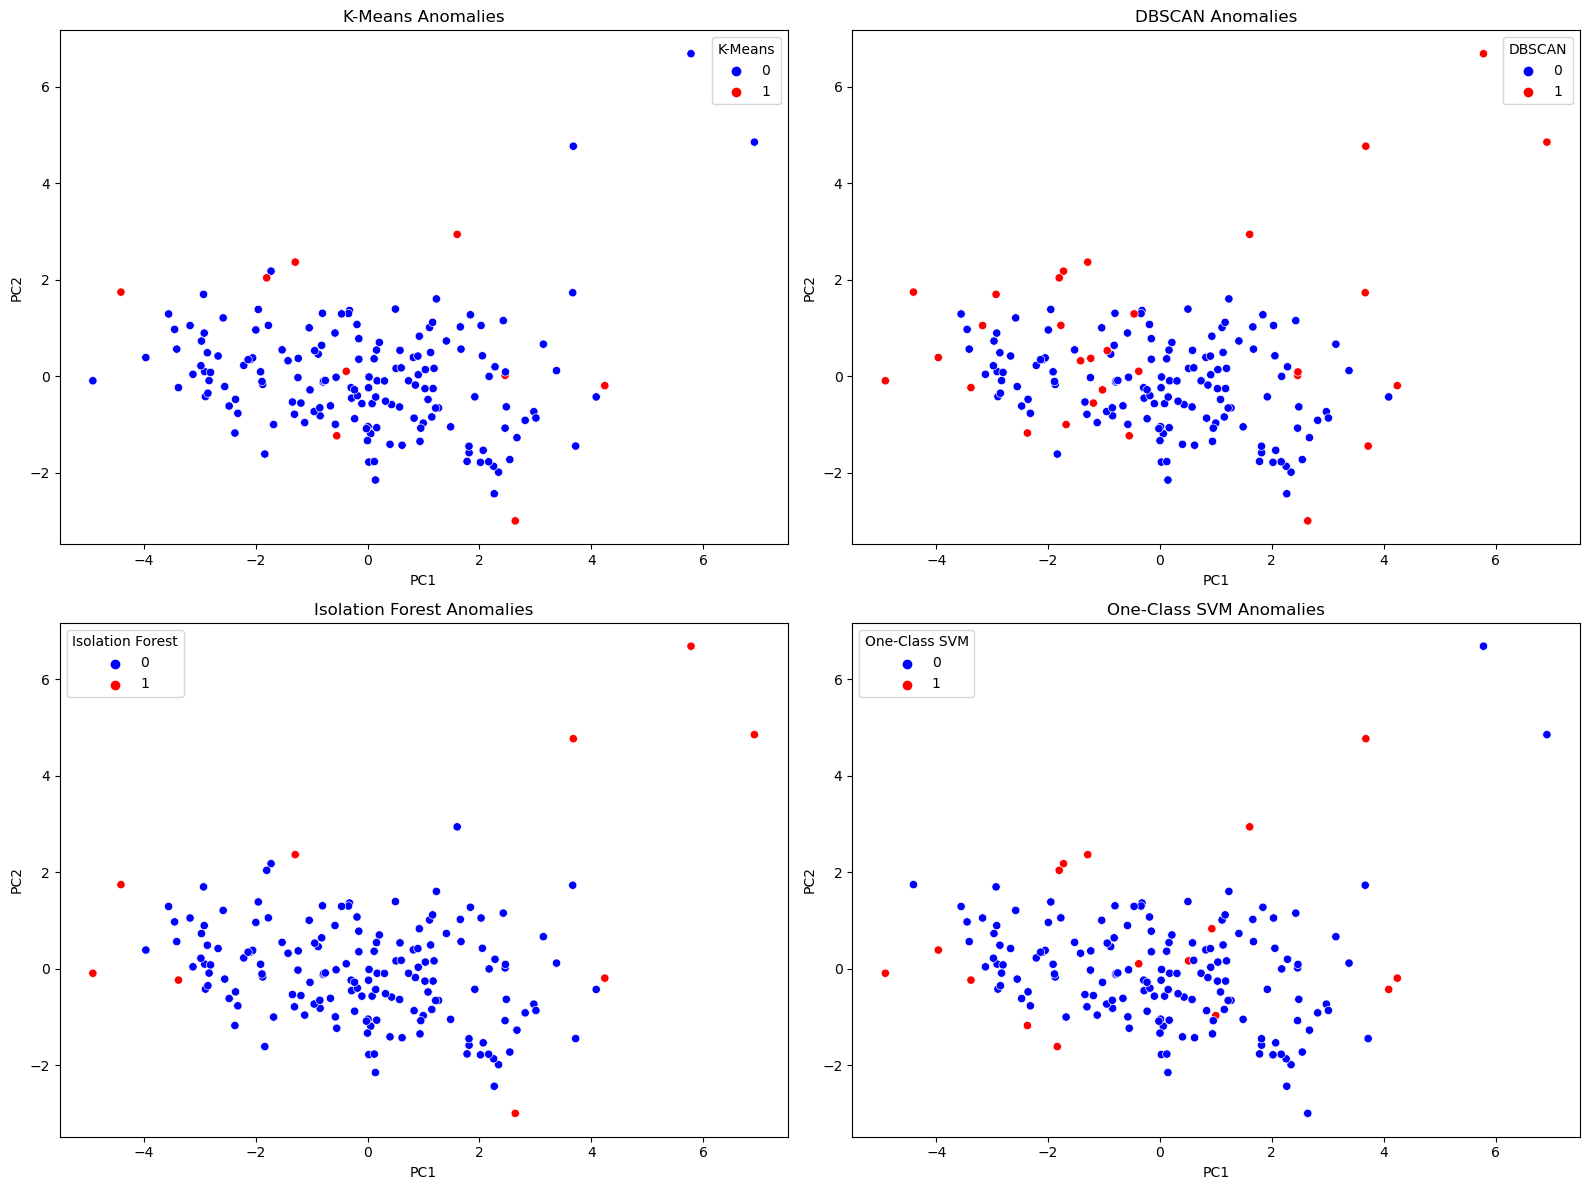

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Ensure anomaly_df is populated with valid predictions
# Creating a copy of the anomaly_df to make temporary changes within this block
temp_anomaly_df = pd.DataFrame({
    "K-Means": kmeans_anomalies.astype(int),  # Convert Boolean to integer
    "DBSCAN": (dbscan_labels == -1).astype(int),  # DBSCAN -1 are anomalies
    "Isolation Forest": (iso_forest_anomalies == -1).astype(int),  # Isolation Forest -1 are anomalies
    "One-Class SVM": (svm_anomalies == -1).astype(int)  # One-Class SVM -1 are anomalies
})

# Add the country field to the temporary DataFrame for visualization
temp_anomaly_df["country"] = country_data["country"]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_country_data)

# Create a DataFrame with the two principal components
temp_pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
temp_pca_df["country"] = country_data["country"]

# Add anomaly results to temporary PCA DataFrame
temp_pca_df["K-Means"] = temp_anomaly_df["K-Means"]
temp_pca_df["DBSCAN"] = temp_anomaly_df["DBSCAN"]
temp_pca_df["Isolation Forest"] = temp_anomaly_df["Isolation Forest"]
temp_pca_df["One-Class SVM"] = temp_anomaly_df["One-Class SVM"]

# Create subplots for each algorithm's anomaly detection
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot for K-Means
sns.scatterplot(data=temp_pca_df, x="PC1", y="PC2", hue="K-Means", ax=axes[0, 0], palette={1: "red", 0: "blue"})
axes[0, 0].set_title("K-Means Anomalies")

# Plot for DBSCAN
sns.scatterplot(data=temp_pca_df, x="PC1", y="PC2", hue="DBSCAN", ax=axes[0, 1], palette={1: "red", 0: "blue"})
axes[0, 1].set_title("DBSCAN Anomalies")

# Plot for Isolation Forest
sns.scatterplot(data=temp_pca_df, x="PC1", y="PC2", hue="Isolation Forest", ax=axes[1, 0], palette={1: "red", 0: "blue"})
axes[1, 0].set_title("Isolation Forest Anomalies")

# Plot for One-Class SVM
sns.scatterplot(data=temp_pca_df, x="PC1", y="PC2", hue="One-Class SVM", ax=axes[1, 1], palette={1: "red", 0: "blue"})
axes[1, 1].set_title("One-Class SVM Anomalies")

plt.tight_layout()
plt.show()


### Notes - Each Algorithm
**K-Means Anomalies:**
-  **Insight:** K-Means detects anomalies as points farthest from the centroids. It looks like K-Means has flagged a moderate number of anomalies, most of which are located in areas of lower point density, indicating they are farther away from cluster centers.
-  **Key Takeaway:** K-Means is performing well at detecting points that don't belong to tight clusters, but it is sensitive to the choice of the number of clusters (in this case, 3). Some anomalies appear isolated in less populated regions, suggesting genuine outliers.

**DBSCAN Anomalies:**
-  **Insight:** DBSCAN is particularly good at detecting noise points, especially in areas where data points aren't densely packed. There are multiple red points in the outer areas, indicating countries that don’t fit well into any dense group (clusters).
-  **Key Takeaway:** DBSCAN is more aggressive in flagging anomalies, especially in regions where data density drops. The model seems well-suited for detecting noise in sparse areas, although it may overflag anomalies in moderately dense areas.

**Isolation Forest Anomalies:**
-  **Insight:** Isolation Forest excels at identifying anomalies by "isolating" points that require fewer splits in a decision tree. In this case, it focuses more on points that are truly isolated from the bulk of the data, particularly in regions of low density.
-  **Key Takeaway:** Isolation Forest detects a smaller but potentially more reliable subset of outliers, especially those that are highly isolated from the majority of the data. It is generally conservative but effective in flagging extreme outliers.

**One-Class SVM Anomalies:**
-  **Insight:** One-Class SVM uses a decision boundary to separate normal data from outliers. The anomalies (red points) are those that fall outside the main decision boundary. It seems to flag outliers in areas where the density begins to drop off, although it's less aggressive than DBSCAN.
-  **Key Takeaway:** One-Class SVM effectively identifies data points that deviate significantly from the main distribution. It performs well in picking up anomalies near the boundaries of dense areas, though it does not overflag points.

### Notes - General Observations
-  **Consistency:** All models agree on flagging some points, particularly in low-density areas (outliers in the periphery of the data). For example, certain countries near the top and right edges of the plots are consistently flagged as anomalies across all models.
-  **Aggressiveness:** DBSCAN appears to be the most aggressive in flagging anomalies, while Isolation Forest is more conservative and likely to highlight extreme outliers. K-Means strikes a balance, while One-Class SVM provides a middle ground between DBSCAN and Isolation Forest.
-  **Utility:** Depending on the context (e.g., wanting to flag extreme vs moderate anomalies), each model offers distinct advantages:
    -  **DBSCAN:** Best for discovering "noise" or outliers in less dense regions.
    -  **Isolation Forest:** Excellent for highly isolated outliers.
    -  **K-Means:** Suitable for flagging points that don’t fit well into any major cluster.
    -  **One-Class SVM:** Good for defining a boundary between normal and anomalous data, particularly in boundary regions.

# 5. Model Evaluation

In [6]:
# Identify countries that were flagged as anomalies by multiple models

# Count how many models flagged each country as an anomaly
anomaly_df["Anomaly_Count"] = anomaly_df.sum(axis=1)

# Filter countries flagged as anomalies by at least one model
anomaly_summary = anomaly_df[anomaly_df["Anomaly_Count"] > 0]

# Sort by the number of models that flagged the country as an anomaly
anomaly_summary_sorted = anomaly_summary.sort_values(by="Anomaly_Count", ascending=False)

# Display the summary of countries flagged as anomalies by multiple models
print("Anomaly Comparison Across Models:")
print(anomaly_summary_sorted)


Anomaly Comparison Across Models:
                          K-Means  DBSCAN  Isolation Forest  One-Class SVM  \
country                                                                      
Equatorial Guinea            True    True              True           True   
Qatar                        True    True              True           True   
Micronesia, Fed. Sts.        True    True             False           True   
Lesotho                      True    True             False           True   
United States                True    True              True          False   
Sierra Leone                False    True              True           True   
Seychelles                   True    True             False           True   
Haiti                        True    True              True          False   
Nigeria                     False    True              True           True   
Malta                       False    True              True           True   
Timor-Leste                 Fa

In [7]:
# Filter the original dataset to show the socio-economic data for the top flagged countries
top_anomalies = ["Equatorial Guinea", "Venezuela", "Haiti", "Nigeria", "Micronesia, Fed. Sts."]
anomaly_details = country_data[country_data['country'].isin(top_anomalies)]

# Display the socio-economic data of the top flagged countries
print("Top Anomalous Countries' Socio-Economic Data:")
print(anomaly_details)

Top Anomalous Countries' Socio-Economic Data:
                   country  child_mort  exports  health  imports  income  \
49       Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
66                   Haiti       208.0     15.3    6.91     64.7    1500   
101  Micronesia, Fed. Sts.        40.0     23.5   14.20     81.0    3340   
113                Nigeria       130.0     25.3    5.07     17.4    5150   
163              Venezuela        17.1     28.5    4.91     17.6   16500   

     inflation  life_expec  total_fer   gdpp  
49       24.90        60.9       5.21  17100  
66        5.45        32.1       3.33    662  
101       3.80        65.4       3.46   2860  
113     104.00        60.5       5.84   2330  
163      45.90        75.4       2.47  13500  


### Notes
Socio-economic data for the countries that were most frequently flagged as anomalies:

**Equatorial Guinea:**
-  High child mortality (111) and fertility rate (5.21).
-  High income ($33,700) but low life expectancy (60.9 years).
-  Significant inflation (24.9%).

**Haiti:**
-  Extremely high child mortality (208) and very low life expectancy (32.1 years).
-  Low income (\\$1,500) and GDP per capita (\\$662).
-  High imports relative to exports.

**Micronesia, Fed. Sts.:**
-  Moderate child mortality (40) and low income ($3,340).
-  Very high health spending (14.2% of GDP) and high import dependency (81%).

**Nigeria:**
-  High child mortality (130) and high inflation (104%).
-  Low GDP per capita (\\$2,330) and high fertility rate (5.84).

**Venezuela:**
-  Moderate socio-economic indicators but significant inflation (45.9%), reflecting its recent economic turmoil.


### Socio-Economic Insights:
-  Haiti and Nigeria stand out due to their extreme child mortality and low life expectancy.
-  Venezuela and Nigeria are suffering from hyperinflation, which could explain their economic instability.
-  Equatorial Guinea and Micronesia show disparities in terms of wealth vs health or import-export dependencies.

These findings suggest that the anomalies detected are driven by severe socio-economic disparities such as high child mortality, inflation, or low life expectancy.

# 6. Conclusion

## Results Summary
**The countries most frequently flagged as anomalies across multiple models were:**
-  Equatorial Guinea: Flagged by all models due to high child mortality, low life expectancy, and economic disparities.
-  Venezuela, Haiti, Nigeria, and Micronesia: These countries were also frequently flagged, showing signs of significant socio-economic challenges such as hyperinflation (Venezuela and Nigeria), high child mortality (Haiti), and import dependency (Micronesia).

**Socio-Economic Insights:**
-  Haiti: Extremely high child mortality and low life expectancy, indicating a severe health crisis.
-  Nigeria and Venezuela: Both showed signs of hyperinflation, economic instability, and relatively low GDP per capita.
-  Equatorial Guinea: Despite a high income level, it showed poor health outcomes and high child mortality.

## Key Insights
**Economic Disparities:** Countries like Equatorial Guinea and Venezuela show that high income does not necessarily correlate with better health outcomes.

**Hyperinflation and Instability:** Countries suffering from hyperinflation, such as Venezuela and Nigeria, were consistently flagged as outliers, suggesting that extreme economic instability heavily influences anomaly detection.

**Child Mortality:** Countries like Haiti and Nigeria were flagged due to extremely high child mortality rates, reflecting health and developmental challenges.

## Considerations for Further Development
**In-Depth Socio-Economic Analysis:** Investigate the specific socio-political and economic factors driving the anomalies in flagged countries. For example, examine the policies or historical contexts leading to poor health outcomes in high-income nations like Equatorial Guinea.

**Model Refinement:** Further tune models based on domain-specific knowledge, such as the expected proportion of anomalies, and adjust contamination rates accordingly.
    
**Expand the Model Scope:** Consider adding more features or external data sources, such as political stability indices or natural disaster frequency, to improve the detection of anomalies influenced by other external factors.